In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
#eda
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [5]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [6]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
print(x)

[0.21254053 0.11820708 0.09406418 0.09085735]
[[ 0.62411073  2.32127028  2.47467255  2.67623949]
 [-0.45598798 -0.95735098  1.1395948   2.42683833]
 [-1.82880491  0.04288477 -0.45222878  0.40641491]
 ...
 [ 2.45900545  0.47826191  2.20821632  0.25937644]
 [ 1.76275536 -2.33681621  0.45475258  0.53680667]
 [-0.86005677  1.06851556 -0.69007429  0.23045341]]


In [7]:
#since it is supervised learning we split the data into train and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
#K-nearest neighbors algo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski',p=2)
classifier.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=7)

In [23]:
#predicting the output
y_pred = classifier.predict(x_te)

#calculating the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_te,y_pred))

0.8688524590163934


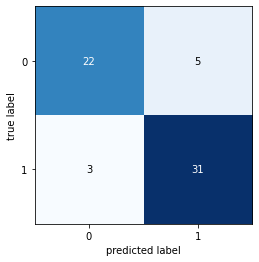

In [25]:
#plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions
cm = confusion_matrix(y_te,y_pred)
plot_confusion_matrix(cm)
plt.show()

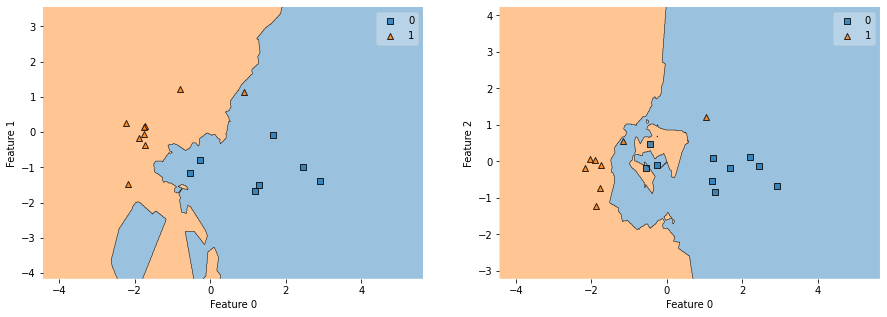

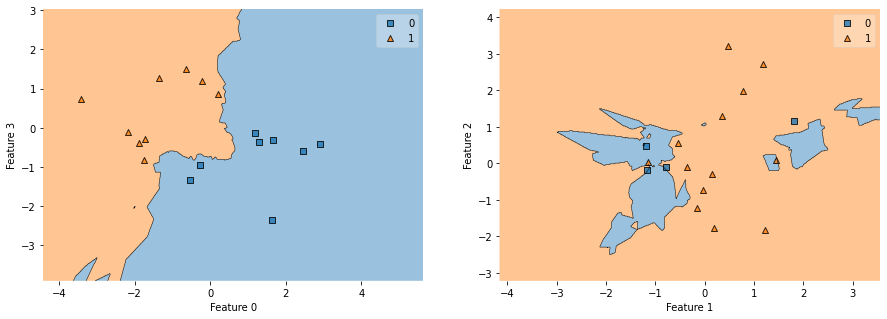

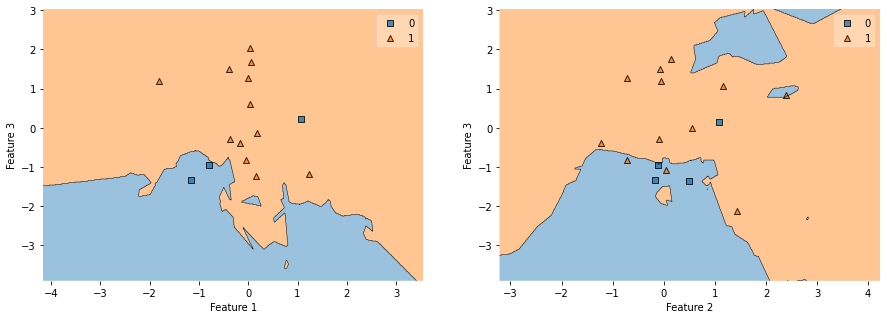

In [22]:
#plotting the decision regions
value = -1
width = 1

fig, axes1 = plt.subplots(1, 2, figsize=(15, 5))
plot_decision_regions(X=x_te,y=y_te,clf=classifier, feature_index=[0,1], filler_feature_values={2:value, 3:value}, filler_feature_ranges={2:width, 3:width}, ax=axes1[0])
axes1[0].set_xlabel('Feature 0')
axes1[0].set_ylabel('Feature 1')

plot_decision_regions(X=x_te,y=y_te,clf=classifier, feature_index=[0,2], filler_feature_values={1:value, 3:value}, filler_feature_ranges={1:width, 3:width}, ax=axes1[1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 2')
plt.show()

fig, axes2 = plt.subplots(1, 2, figsize=(15, 5))
plot_decision_regions(X=x_te,y=y_te,clf=classifier, feature_index=[0,3], filler_feature_values={1:value, 2:value}, filler_feature_ranges={1:width, 2:width}, ax=axes2[0])
axes2[0].set_xlabel('Feature 0')
axes2[0].set_ylabel('Feature 3')

plot_decision_regions(X=x_te,y=y_te,clf=classifier, feature_index=[1,2], filler_feature_values={0:value, 3:value}, filler_feature_ranges={0:width, 3:width}, ax=axes2[1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig, axes3 = plt.subplots(1, 2, figsize=(15, 5))
plot_decision_regions(X=x_te,y=y_te,clf=classifier, feature_index=[1,3], filler_feature_values={0:value, 2:value}, filler_feature_ranges={0:width, 2:width}, ax=axes3[0])
axes3[0].set_xlabel('Feature 1')
axes3[0].set_ylabel('Feature 3')

plot_decision_regions(X=x_te,y=y_te,clf=classifier, feature_index=[2,3], filler_feature_values={0:value, 1:value}, filler_feature_ranges={0:width, 1:width}, ax=axes3[1])
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.show()